In [1]:
from intent_matching import matching
import pandas as pd
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
_PATH_DATA = '../data'
_PATH_TEST_B = os.path.join(_PATH_DATA,'test_b.csv')
_PATH_TEST_A = os.path.join(_PATH_DATA,'test_a.csv')
_PATH_INTENT = os.path.join(_PATH_DATA,'intent.json')

In [3]:
dict_intent = json.load(open(_PATH_INTENT,'r'))
dict_intent.keys()

dict_keys(['overview', 'symptoms', 'main_type', 'risk_factor', 'severe', 'prevention', 'diag', 'treatment'])

In [4]:
df_test = pd.read_csv(_PATH_TEST_A)
df_test.head()

,no,annotate,intent
0,0,Thưa bác muốn một vài thông tin về triệu chứng...,symptoms
1,1,Thưa bác muốn một vài thông tin về triệu chứng...,symptoms
2,2,Thưa bác muốn một vài thông tin về triệu chứng...,symptoms
3,3,Chào bác sỹ muốn biết về dấu hiệu về bệnh ung ...,symptoms
4,4,Chào bác sỹ muốn biết về dấu hiệu về bệnh ung ...,symptoms


In [5]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [6]:
dict_invest = {}
## init dict_invest
for k in list(dict_intent.keys()):
    dict_invest[k] = 0


In [7]:
list_sentence = list(df_test['annotate'])
list_label = list(df_test['intent'])
list_label = [item.split(',') for item in list_label]

In [8]:
list_threshold = np.arange(0.75,0.85, 0.05).tolist()
# list_threshold = [0.75]

# list_threshold
list_f1 = []

In [20]:
# list_threshold

In [9]:
## config type calculate edit distance

# type_dist = 'token_set'
type_dist = 'partial'

In [10]:
for threshold in list_threshold:

    list_matching = []
    # count = 0
    list_investigate = []
    list_precision = []
    list_recall = []
    for idx, sent in tqdm(enumerate(list_sentence), total = len(list_sentence)):

        ## investigate threshold

        dict_matching = matching(str(sent),threshold,type_dist)
        list_res_match = dict_matching['intent']
        list_investigate.append(dict_matching)
        res_match = [item[0] for item in list_res_match]

        list_labeling = [l.replace(':','') for l in list_label[idx]]

        intersect = intersection(res_match,list_labeling)

        ## define TP,FP,FN
        TP = len(intersect)

        FP = len(list(set(res_match) - set(list_labeling)))
        precision = TP/(TP+FP)
        list_precision.append(precision)

        FN = len(list(set(list_labeling) - set(res_match)))
        recall = TP/(TP+FN)
        list_recall.append(recall)


        precision_mean = np.mean(list_precision)
        recall_mean = np.mean(list_recall)
        f1_score = 2*(precision_mean*recall_mean)/(precision_mean+recall_mean)
    list_f1.append(f1_score)

100%|██████████| 22161/22161 [13:13<00:00, 27.92it/s]


In [11]:
# list_f1

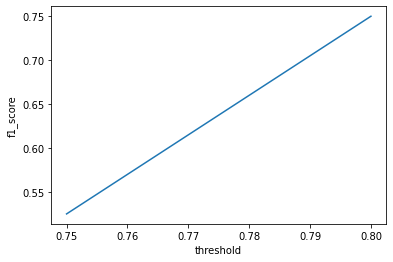

In [21]:
plt.plot(list_threshold,list_f1)

plt.xlabel('threshold')
plt.ylabel('f1_score')
plt.show()

In [23]:
def lineFromPoints(P, Q):
 
    a = Q[1] - P[1]
    b = P[0] - Q[0]
    c = a*(P[0]) + b*(P[1])
 
    if(b < 0):
        print("The line passing through points P and Q is:",
              a, "x - ", b, "y = ", c, "\n")
    else:
        print("The line passing through points P and Q is: ",
              a, "x + ", b, "y = ", c, "\n")

In [24]:
P = [list_f1[0], list_f1[1]]
Q = [list_threshold[0], list_threshold[1]]
lineFromPoints(P, Q)

The line passing through points P and Q is: 0.05039103311391824 x -  -0.22465034257610517 y =  -0.14192699922544547 



In [27]:
(0.05039103311391824*1 + 0.14192699922544547)/0.22465034257610517

0.8560771825852516

In [22]:
list_f1

[0.5253496574238948, 0.7496089668860818]

In [14]:
# df_investigate = pd.DataFrame(list_investigate)
# df_investigate

In [15]:
# df_investigate['true_intent'] = list_label
# df_investigate['precision'] = list_precision
# df_investigate['recall'] = list_recall

In [16]:
# df_investigate

In [17]:
# list_fine_precision = []
# for item in list_precision:
#     if item != 'none':
#         list_fine_precision.append(item)

In [18]:
df_investigate.to_csv(os.path.join(_PATH_DATA,'test_a_investigate.csv'),header=True,index=False)

NameError: name 'df_investigate' is not defined